<a href="https://colab.research.google.com/github/smuriu06/my_projects/blob/main/Car_Sale_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background

This report analyzes car sales data to identify key trends, performance metrics, and insights that can drive business decisions. The dataset  includes details such as sales dates, car models, prices, engine type, and customer information. By examining this data, the aim is to uncover patterns in sales performance, regional preferences, and factors influencing revenue. The insights gained can help optimize inventory management, pricing strategies, and marketing efforts.

#Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Loading and Inspecting Data

In [2]:
#loading data
df=pd.read_excel('/content/Copy of Car Sales.xlsx')

In [4]:
#data shape
df.shape

(23906, 16)

In [5]:
#data head
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [6]:
#data distribution
df.describe()

,Date,Annual Income,Price ($),Phone
count,23906,2.390600e+04,23906.000000,2.390600e+04
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846,7.497741e+06
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746495e+06
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496198e+06
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000,8.248146e+06
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06
std,NaN,7.200064e+05,14788.687608,8.674920e+05


In [7]:
#checking columns
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [8]:
#checking data types
df.dtypes

,0
Car_id,object
Date,datetime64[ns]
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


Data types for all the columns are correct

In [9]:
#missing values
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


One missing value found (customer column)

In [10]:
#duplicates
df.duplicated().sum()

0

no duplicates

#Data Cleaning

##Handling the Missing Value

In [11]:
#checking missing value customer name column
df[df['Customer Name'].isnull()]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,2022-11-05,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


In [12]:
#fill the missing customer name with a placeholder
df['Customer Name'].fillna('Unknown',inplace=True)

<ipython-input-12-9f2cc1fe7608>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Name'].fillna('Unknown',inplace=True)


Since the customer name is not critical in the data-frame, a placeholder has been used to remove the null

In [13]:
#rechecking nulls
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


#Exploratory Data Analysis (EDA)

## Customer Demographics

In [14]:
#total number of customers
total_customers=df['Customer Name'].nunique()
print(total_customers)

3022


In [15]:
#gender distribution
gender_distribution=df['Gender'].value_counts()
print(gender_distribution)

Gender
Male      18798
Female     5108
Name: count, dtype: int64


In [16]:
#customer average annual income
average_income=df['Annual Income'].mean()
print(average_income)


830840.2851167071


## Companies and Dealers Demographics

In [17]:
#total number of dealers
total_dealers=df['Dealer_Name'].nunique()
print(total_dealers)

28


In [18]:
#total number of companies
total_companies=df['Company'].nunique()
print(total_companies)

30


In [19]:
#total number of models
total_models=df['Model'].nunique()
print(total_models)

154


In [20]:
#top engine
top_engine=df['Engine'].value_counts().head()
print(top_engine)

Engine
DoubleÂ Overhead Camshaft    12571
Overhead Camshaft            11335
Name: count, dtype: int64


In [21]:
#top transmission
top_transmission=df['Transmission'].value_counts().head()
print(top_transmission)

Transmission
Auto      12571
Manual    11335
Name: count, dtype: int64


In [22]:
#top car color
top_color=df['Color'].value_counts().head()
print(top_color)

Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64


In [36]:
#top body style
top_body_type=df['Body Style'].value_counts().head()
print(top_body_type)

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


##Sales Trend Over Time

###Checking sales distribution by month and year

In [23]:
#creating a month column
df['Month'] = df['Date'].dt.strftime('%b')

In [24]:
#sales distribution by month (units) group by year
monthly_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).size()

# Format the output for better readability
monthly_sales = monthly_sales.unstack(level=0)  # Years as columns, months as rows
monthly_sales.index = monthly_sales.index.map(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))  # Convert month numbers to names

print(monthly_sales)



Date  2022  2023
Date            
Jan    315   475
Feb    320   415
Mar    705   830
Apr    800   855
May    750  1145
Jun    690  1025
Jul    700  1025
Aug    810   895
Sep   1475  1830
Oct    835   995
Nov   1620  1850
Dec   1625  1921


clearly illustrates the number of units sold every month for the two years.

In [25]:
#sales distribution (units) by year
yearly_sales = df.groupby(df['Date'].dt.year).size()
yearly_sales.sort_values(ascending=False)

,0
Date,
2023,13261
2022,10645


total number of sold units in 2022 and 2023

### Top Selling Car Models, Companies, Dealers

In [54]:
#top 10 most expensive models
top_expensive_models = (
    df.groupby('Model')['Price ($)']
    .max()  # Calculate the maximum price for each model
    .sort_values(ascending=False)
    .head(10)
)
print(top_expensive_models)


Model
Eldorado       85800
RAV4           85600
A6             85500
S-Class        85250
Malibu         82800
Tacoma         82750
C70            82600
Continental    82500
Pathfinder     75700
Catera         75600
Name: Price ($), dtype: int64


In [27]:
#best selling dealer
best_selling_dealer = df['Dealer_Name'].value_counts().head(10)
print(best_selling_dealer)

Dealer_Name
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Star Enterprises Inc                               1249
Tri-State Mack Inc                                 1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Name: count, dtype: int64


In [28]:
#Top selling companies
top_selling_companies = df['Company'].value_counts().head(10)
print(top_selling_companies)

Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Name: count, dtype: int64


###Revenue Analysis

####Dealer Performace

In [29]:
#total sales per dealer
total_sales_per_dealer = df.groupby('Dealer_Name')['Price ($)'].sum().sort_values(ascending=False)
print(total_sales_per_dealer)

Dealer_Name
Rabun Used Car Sales                               37456655
Progressive Shippers Cooperative Association No    36751460
U-Haul CO                                          35876089
Race Car Help                                      35288706
Saab-Belle Dodge                                   35265865
Scrivener Performance Engineering                  35258525
Star Enterprises Inc                               35113206
Tri-State Mack Inc                                 35091357
Suburban Ford                                      34943473
Ryder Truck Rental and Leasing                     34837906
Iceberg Rentals                                    17883895
Classic Chevy                                      17819055
Gartner Buick Hyundai Saab                         17739506
Capitol KIA                                        17703134
Enterprise Rent A Car                              17695363
Pars Auto Sales                                    17648228
Nebo Chevrolet              

In [37]:
#total sales per model
total_sales_per_model = df.groupby('Model')['Price ($)'].sum().sort_values(ascending=False)
print(total_sales_per_model)

Model
LS400            14263424
Jetta            12287736
Silhouette       12271849
Montero Sport    11472231
Ram Pickup       10655391
                   ...   
Alero              307302
RX300              270302
Avalon             270002
Mirage             172204
Sebring Conv.      162501
Name: Price ($), Length: 154, dtype: int64


In [31]:
#total sales per region
total_sales_per_region = df.groupby('Dealer_Region')['Price ($)'].sum().sort_values(ascending=False)
print(total_sales_per_region)

Dealer_Region
Austin        117192531
Janesville    106351234
Scottsdale     95969374
Aurora         88687382
Greenville     88149602
Pasco          88040714
Middletown     87134628
Name: Price ($), dtype: int64


####Car Preference

In [32]:
#total sales per company
total_sales_per_company = df.groupby('Company')['Price ($)'].sum().sort_values(ascending=False)
print(total_sales_per_company)

Company
Chevrolet     47655265
Ford          47231583
Dodge         44124996
Oldsmobile    35434512
Mercedes-B    34624123
Volkswagen    34082881
Mitsubishi    34062466
Toyota        32759564
Chrysler      29141873
Lexus         27287703
Cadillac      26713805
Mercury       24939733
Nissan        23964095
Pontiac       23369207
Volvo         21925200
Honda         19882735
BMW           19821592
Saturn        18220269
Plymouth      18142873
Acura         17058649
Lincoln       15452262
Buick         14765485
Subaru        11312193
Audi          10694638
Porsche        8185637
Saab           7668431
Jeep           7643814
Infiniti       5717040
Hyundai        5117966
Jaguar         4524875
Name: Price ($), dtype: int64


In [33]:
#sales by car color
sales_by_color = df.groupby('Color')['Price ($)'].sum().sort_values(ascending=False)
print(sales_by_color)

Color
Pale White    309358670
Black         224433618
Red           137733177
Name: Price ($), dtype: int64


In [34]:
#price distribution by region
price_distribution_by_region = df.groupby('Dealer_Region')['Price ($)'].mean()
print(price_distribution_by_region)

Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64


#Data Visualization

Customers' Gender Distribution

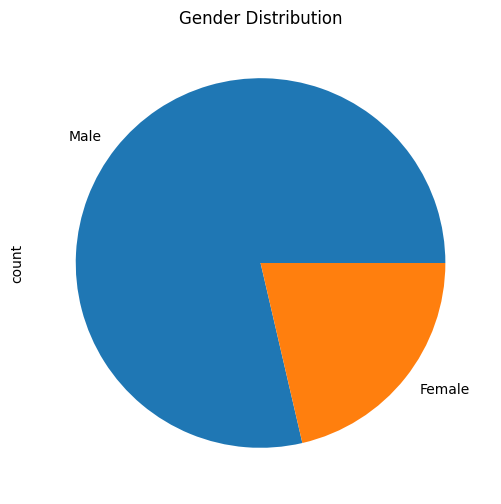

In [59]:
#plot gender distribution
gender_distribution.plot(kind='pie', figsize=(10, 6))
plt.title('Gender Distribution')
plt.show()

Monthly Sales Grouped by Years

<Axes: xlabel='Date'>

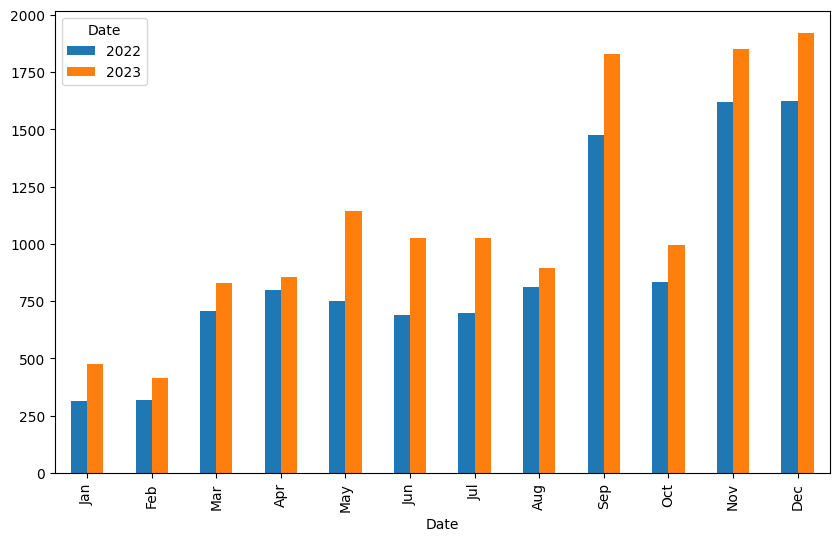

In [45]:
#plot sales distribution by month (units) group by year
monthly_sales.plot(kind='bar', figsize=(10, 6))


Total Sales in 2022 and 2023

Text(0.5, 1.0, 'Yearly Sales Distribution')

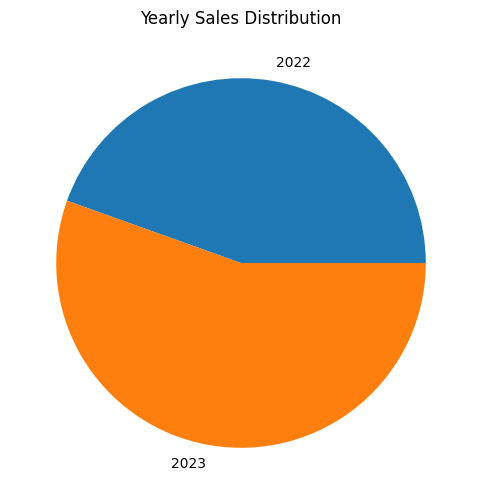

In [50]:
#plot sales distribution (units) by year pie chart
yearly_sales.plot(kind='pie', figsize=(10, 6))
plt.title('Yearly Sales Distribution')

Top Selling Companies by Unit Solds

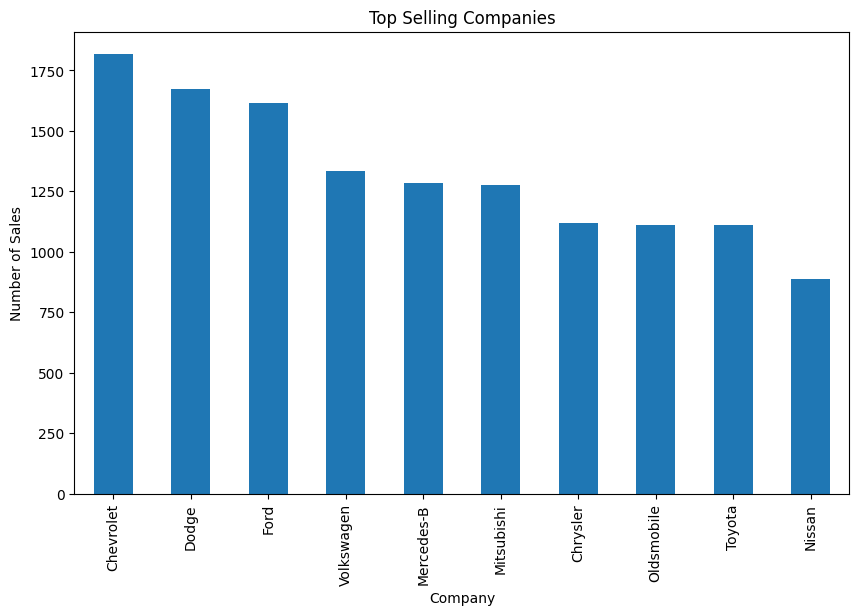

In [56]:
#plot top selling companies
top_selling_companies.plot(kind='bar', figsize=(10, 6))
plt.title('Top Selling Companies')
plt.xlabel('Company')
plt.ylabel('Number of Sales')
plt.show()

Unit Sold by Car Color

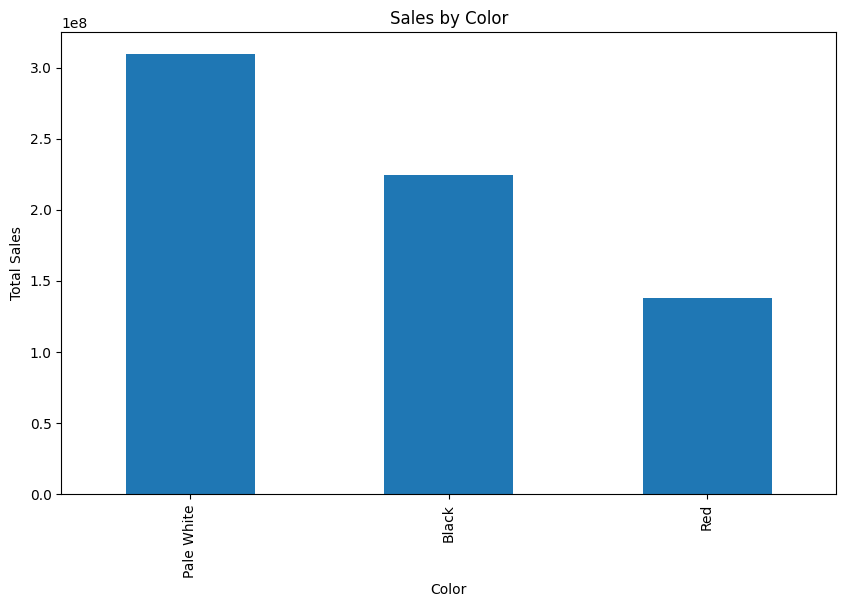

In [65]:
#plot sale by color
sales_by_color.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Color')
plt.xlabel('Color')
plt.ylabel('Total Sales')
plt.show()

#Insights and Recommendations

##Insights

These are the Key insights from the data
1. Most of the customers are male
2. Sales are high towards end of the year, (Nov,Dec) and low at the start of the year (Jan, Feb)
3. Sales progressively increase from January towards December.
4. More Sales were made in 2023 as compared to 2022
5. Top Selling Brands are Chevrolet, Dodge, and Ford
6. Pale white color leads in sales, then black.
Color Red has the lowest sales

##Recommendations

1. Targeted Marketing for Male Customers
Since most customers are male, dealerships should tailor marketing campaigns, promotions, and advertisements to appeal to male buyers.
To boost female buyers sales, consider female-Centric Marketing Campaigns, such as using female influencers and brand ambassadors

2. Seasonal sales strategy
Boost Promotions in Low Sales Months: Since sales are low in January and February, introduce discounts, financing options, or promotional campaigns to attract buyers.
Maximize Peak Sales in Q4 (Nov, Dec): Stock up on high-demand models before the year-end surge and introduce limited-time offers to increase sales further.

3. Increase Inventory for High-Demand Models
Prioritize stocking more Chevrolet, Dodge, and Ford models, as they are the best-selling brands.
Conduct further analysis to see which specific models drive sales and focus marketing efforts on them.

4. Optimize Color Inventory
Since pale white and black cars sell the most, dealerships should prioritize these colors in inventory.
Reduce the stock of red cars or introduce special discounts to clear slow-moving inventory.

5. Enhance Sales Strategies for 2024
Since 2023 had higher sales than 2022, apply successful strategies from 2023 (e.g., pricing, marketing, promotions) to maintain the growth trend in 2024.
Expand customer engagement through social media, online ads, and referral programs to sustain the upward sales trajectory.